<a id="top"></a>

# Characterizing Variable Stars with APOGEE + TESS
***

## Learning Goals

By the end of this tutorial, you will:

- Understand how to search the MAST Archive and download SDSS APOGEE data using `astroquery.mast`
- Plot a stellar spectrum and an HR diagram and using APOGEE data
- Understand how to search for TESS light curves complementing the APOGEE observations
- Explore different types of variable stars using their APOGEE parameters and TESS light curves


## Table of Contents
* [Introduction](#Introduction)
* [Imports](#Imports)
* [Accessing APOGEE data at MAST](#APOGEE)
    * [Querying all APOGEE data](#APOGEE-query)
    * [Searching for a specific star](#APOGEE-star)
    * [Downloading APOGEE data products](#APOGEE-download)
    * [Plotting an APOGEE spectrum](#APOGEE-spectrum)
    * [Downloading the APOGEE allStar catalog](#APOGEE-allstar)
    * [Plotting an HR diagram from APOGEE](#APOGEE-plot)
    
* [Searching for TESS data of this star](#TESS)
    * [Coordinate search using astroquery.mast](#TESS-query)
    * [Plotting a light curve from TESS](#TESS-lightcurve)

* [Combining APOGEE and TESS data](#Combining-APOGEE-and-TESS-data)
    * [Plotting APOGEE and TESS data together](Plotting-APOGEE-and-TESS-data-together)
    * [Exploring Different types of Variable Stars](#Exploring-Variables)
        * [RR-Lyrae Variable: 2M11361176+8117369](#rr-lyrae)
        * [Rotationally Variable - 2M19181706+5141323](#rotationally-variable)
        * [Eclipsing Binary - 2M19203184+3830492](#eclipsing-binary)

* [Additional Resources](#Resources)
    * [How to Cite](#Citations)
    * [About This Notebook](#About)


## Introduction
<a id="Introduction"></a>

The [Apache Point Observatory Galactic Evolution Experiment (APOGEE)](https://www.sdss4.org/dr17/irspec/) survey provides infrared-wavelength high-resolution spectroscopy for over 650,000 unique stars from the Milky Way and nearby dwarf galaxies. APOGEE collected data between 2011 - 2020 as part of the [Sloan Digital Sky Survey (SDSS-IV) project](https://www.sdss4.org). APOGEE data is now available at the [Mikulski Archive for Space Telescopes (MAST)](https://archive.stsci.edu) through the [SDSS Legacy Archive at MAST](https://outerspace.stsci.edu/display/SDSS/The+SDSS+Legacy+Archive+at+MAST). 

In this notebook tutorial, we will demonstrate how to access APOGEE data at MAST using Python. One APOGEE star, a Cepheid Variable named `V1154-Cyg` will be used to demonstrate the basics of how to download and plot APOGEE data. We will then combine this APOGEE spectrum with light curves from the TESS mission, also accessible from MAST, to study this variable star.

## Imports
<a id="Imports"></a>

The main packages we're using for this notebook and their use-cases are:
- *astroquery.mast Observations* for searching the MAST archive
- *astropy.io fits* for accessing FITS files
- *astropy.table Table* for accessing FITS tables
- *astropy.units* for working with astronomical units
- *astropy.coordinates* for handling astronomical coordinates
- *matplotlib.pyplot* for plotting data
- *numpy* to handle array functions

In [1]:
%matplotlib inline

from astroquery.mast import Observations
import astropy.io.fits as fits
from astropy.table import Table
from astropy.coordinates import SkyCoord

import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

This cell updates some of the settings in `matplotlib` to use larger font sizes in the figures:

In [2]:
#Update Plotting Parameters
params = {'axes.labelsize': 12, 'xtick.labelsize': 12, 'ytick.labelsize': 12, 
          'text.usetex': False, 'lines.linewidth': 1,
          'axes.titlesize': 18, 'font.family': 'serif', 'font.size': 12}
plt.rcParams.update(params)

***
<a id="APOGEE"></a>
# Accessing APOGEE data at MAST

The [SDSS Legacy Archive at MAST](https://outerspace.stsci.edu/display/SDSS/The+SDSS+Legacy+Archive+at+MAST) hosts all of the science-ready data products from the [SDSS-IV APOGEE Survey](https://www.sdss4.org/dr17/irspec/), which includes spectra for over 650,000 unique stars in the Milky Way. APOGEE acquired observations in both the northern and southern hemispheres, targeting the disk, bulge, bar, and halo components of the Milky Way, as well as several hundred stars in nearby satellite galaxies (including the LMC and SMC). This notebook will demonstrate how to search and download APOGEE data using MAST!



<a id="APOGEE-query"></a>
## Querying all APOGEE data

Searching for APOGEE data is straightforward with `astroquery.mast`. In this example, we use `Observations.query_criteria` and search for `provenance_name = 'APOGEE'`. This will return a table describing all of the APOGEE data hosted by the MAST archive.

Other useful search parameters for APOGEE data might include:
* `obs_collection = 'SDSS'`: searches for all SDSS data
* To specify telescope, use the `instrument_name` field. For example, `instrument_name = 'apogee-lco25m'` limits the search to the stars that were observed with the Las Campanas Observatory 2.5-m telescope in the southern hemisphere.
* Use `target_name` to search for stars using their APOGEE ID (usually the 2MASS ID - for example `'2M05320041-0017041'`)
* `obs_id` can help search for specific targets or fields. Note that wild cards (`*`) are allowed in the search fields, for example: 
  * `obs_id='*n7789*'` for anything in the "N7789" field
  * `obs_id='*2M05320041-0017041*'` for a specific star name (2MASS ID)


In [3]:
# Search for APOGEE data
# Using the pagesize and page parameters to only return first 10 results
apogee_obs_list = Observations.query_criteria(provenance_name='APOGEE', pagesize=10, page=1)

# Display First Ten Entries in Table
apogee_obs_list

intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,dataproduct_type,proposal_pi,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_id,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,objID
str7,str4,str6,str13,str4,str4,str8,str18,str4,str44,float64,float64,str8,str18,int64,float64,float64,float64,float64,float64,str63,float64,str3,str1,int64,str49,str1,str85,str6,bool,float64,str9,str9
science,SDSS,APOGEE,apogee-apo25m,SDSS,None,INFRARED,2M19104418+1055185,STAR,sdss_apogee_apo25m_045+00_2m19104418+1055185,287.684117,10.92183,spectrum,SDSS Collaboration,3,56465.358699537035,56539.13910020833,16000.0,1514.0,1696.0,Apache Point Observatory Galactic Evolution Experiment (APOGEE),59554.0,N/A,--,--,CIRCLE 287.684117 10.92183 0.0002777777777777778,--,mast:SDSS/apogee/apo25m/045+00/2M19104418+1055185/apStar-dr17-2M19104418+1055185.fits,PUBLIC,False,nan,233840714,673107622
science,SDSS,APOGEE,apogee-apo25m,SDSS,None,INFRARED,2M19133987+1023256,STAR,sdss_apogee_apo25m_045+00_2m19133987+1023256,288.416137,10.390466,spectrum,SDSS Collaboration,3,56465.358699537035,56539.13910020833,16000.0,1514.0,1696.0,Apache Point Observatory Galactic Evolution Experiment (APOGEE),59554.0,N/A,--,--,CIRCLE 288.416137 10.390466 0.0002777777777777778,--,mast:SDSS/apogee/apo25m/045+00/2M19133987+1023256/apStar-dr17-2M19133987+1023256.fits,PUBLIC,False,nan,233840730,673107695
science,SDSS,APOGEE,apogee-apo25m,SDSS,None,INFRARED,2M19144613+1000166,STAR,sdss_apogee_apo25m_045+00_2m19144613+1000166,288.69222,10.004623,spectrum,SDSS Collaboration,3,56465.358699537035,56539.13910020833,16000.0,1514.0,1696.0,Apache Point Observatory Galactic Evolution Experiment (APOGEE),59554.0,N/A,--,--,CIRCLE 288.69222 10.004623 0.0002777777777777778,--,mast:SDSS/apogee/apo25m/045+00/2M19144613+1000166/apStar-dr17-2M19144613+1000166.fits,PUBLIC,False,nan,233840738,673107726
science,SDSS,APOGEE,apogee-apo25m,SDSS,None,INFRARED,2M19174349+1101513,STAR,sdss_apogee_apo25m_045+00_2m19174349+1101513,289.431211,11.030917,spectrum,SDSS Collaboration,3,56465.358699537035,56539.13910020833,16000.0,1514.0,1696.0,Apache Point Observatory Galactic Evolution Experiment (APOGEE),59554.0,N/A,--,--,CIRCLE 289.431211 11.030917 0.0002777777777777778,--,mast:SDSS/apogee/apo25m/045+00/2M19174349+1101513/apStar-dr17-2M19174349+1101513.fits,PUBLIC,False,nan,233840745,673107759
science,SDSS,APOGEE,apogee-apo25m,SDSS,None,INFRARED,2M19132859+0919320,STAR,sdss_apogee_apo25m_045+00_2m19132859+0919320,288.369152,9.325556,spectrum,SDSS Collaboration,3,56465.358699537035,56539.13910020833,16000.0,1514.0,1696.0,Apache Point Observatory Galactic Evolution Experiment (APOGEE),59554.0,N/A,--,--,CIRCLE 288.369152 9.325556 0.0002777777777777778,--,mast:SDSS/apogee/apo25m/045+00/2M19132859+0919320/apStar-dr17-2M19132859+0919320.fits,PUBLIC,False,nan,233840781,673107948
science,SDSS,APOGEE,apogee-apo25m,SDSS,None,INFRARED,2M19091660+1102595,STAR,sdss_apogee_apo25m_045+00_2m19091660+1102595,287.319199,11.049877,spectrum,SDSS Collaboration,3,56465.358699537035,56539.13910020833,16000.0,1514.0,1696.0,Apache Point Observatory Galactic Evolution Experiment (APOGEE),59554.0,N/A,--,--,CIRCLE 287.319199 11.049877 0.0002777777777777778,--,mast:SDSS/apogee/apo25m/045+00/2M19091660+1102595/apStar-dr17-2M19091660+1102595.fits,PUBLIC,False,nan,233840782,673107951
science,SDSS,APOGEE,apogee-apo25m,SDSS,None,INFRARED,2M19114657+1016164,STAR,sdss_apogee_apo25m_045+00_2m19114657+1016164,287.944077,10.271223,spectrum,SDSS Collaboration,3,56465.358699537035,56539.13910020833,16000.0,1514.0,1696.0,Apache Point Observatory Galactic Evolution Experiment (APOGEE),59554.0,N/A,--,--,CIRCLE 287.944077 10.271223 0.0002777777777777778,--,mast:SDSS/apogee/apo25m/045+00/2M19114657+1016164/apStar-dr17-2M19114657+1016164.fits,PUBLIC,False,nan,233840795,673108016
science,SDSS,APOGEE,apogee

<a id="APOGEE-star"></a>
## Searching for a specific star

Let's narrow down the search to one particular star: cepheid variable "V1154-Cyg". Cepheid Variables are pulsating stars, which physically grow larger and smaller, and as a result brighter and dimmer, on a regular rhythm of few days. Cepheid variables in particular are useful to study in astronomy because their pulsation period correlates with their intrinsic brightness, making it easy to determine how far away the star is! Later in this notebook, we will look at some other kinds of variable stars.

We can search for this star in particular using the `target_name` keyword:

In [4]:
# Search for APOGEE star V1154_Cyg
apogee_obs_list = Observations.query_criteria(provenance_name='APOGEE',
                                              target_name='V1154_Cyg')

# Display results
apogee_obs_list

intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,dataproduct_type,proposal_pi,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_id,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,objID
str7,str4,str6,str12,str4,str4,str8,str9,str4,str35,float64,float64,str8,str18,int64,float64,float64,float64,float64,float64,str63,float64,str3,str1,int64,str55,str1,str67,str6,bool,float64,str9,str9
science,SDSS,APOGEE,apogee-apo1m,SDSS,None,INFRARED,V1154_Cyg,STAR,sdss_apogee_apo1m_cepheid_v1154_cyg,297.06439209,43.1268806458,spectrum,SDSS Collaboration,3,58002.324245497686,58069.124077939814,24000.0,1514.0,1696.0,Apache Point Observatory Galactic Evolution Experiment (APOGEE),59554.0,N/A,--,--,CIRCLE 297.06439209 43.1268806458 0.0002777777777777778,--,mast:SDSS/apogee/apo1m/cepheid/V1154_Cyg/apStar-dr17-V1154_Cyg.fits,PUBLIC,False,nan,233753893,675403444


From this results table, we can see some basic metadata related to this observation:
* This star was observed with the APO 1-M telescope (`instrument_name`)
* It's coordinates are in the `s_ra` and `s_dec` columns
* From the `t_min` column, we can see that this star was first observed on the date of MJD 58002 (Correpsonding to 2017-09-06) and last observed on MJD 58069 (2017-11-12 )
* APOGEE provides infrared-wavelength (`wavelength_region`) spectra (`dataproduct_type`) with wavelength range of 1514 - 1696 nanometers (`em_min`, `em_max`)

<a id="APOGEE-download"></a>
## Downloading APOGEE data products

List all of the data products available for this star using `Observations.get_product_list()`.

There are 8 total files available for this star, which include the individual spectra from each visit (APVISIT; `apVisit-dr17-*-V1154_Cyg.fits`), the combined spectrum (APSTAR; `apStar-dr17-V1154_Cyg.fits`), the processed and anaylzed spectrum (ASPCAPSTAR; `aspcapStar-dr17-V1154_Cyg.fits`) which contains the best-fit model and stellar parameters from the [APOGEE Stellar Parameters and Chemical Abundance Pipeline (ASPCAP)](https://www.sdss4.org/dr17/irspec/aspcap/). Only the apStar and aspcapStar files are tagged as "Minimum Recommended Products'

More information on the APOGEE data products available at MAST can be found on the [APOGEE Data Products](https://outerspace.stsci.edu/display/DraftSDSS/APOGEE+Data+Products) in the Archive Manual, and more information on all of these products can be seen in the search results table:

In [5]:
# List all products available for this observation
products = Observations.get_product_list(apogee_obs_list)

# Show table
products

obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level,filters
str9,str4,str12,str35,str209,str1,str74,str7,str28,str15,str62,str6,str4,str3,str33,int64,str9,str6,int64,str4
233753893,SDSS,spectrum,sdss_apogee_apo1m_cepheid_v1154_cyg,SDSS APOGEE single-visit spectrum from one night of observation.,S,mast:SDSS/apogee/apo1m/cepheid/V1154_Cyg/apVisit-dr17-58002-V1154_Cyg.fits,SCIENCE,--,APVISIT,https://outerspace.stsci.edu/display/SDSS/APOGEE+Data+Products,APOGEE,dr17,N/A,apVisit-dr17-58002-V1154_Cyg.fits,498240,233753893,PUBLIC,3,None
233753893,SDSS,spectrum,sdss_apogee_apo1m_cepheid_v1154_cyg,SDSS APOGEE single-visit spectrum from one night of observation.,S,mast:SDSS/apogee/apo1m/cepheid/V1154_Cyg/apVisit-dr17-58004-V1154_Cyg.fits,SCIENCE,--,APVISIT,https://outerspace.stsci.edu/display/SDSS/APOGEE+Data+Products,APOGEE,dr17,N/A,apVisit-dr17-58004-V1154_Cyg.fits,498240,233753893,PUBLIC,3,None
233753893,SDSS,spectrum,sdss_apogee_apo1m_cepheid_v1154_cyg,SDSS APOGEE single-visit spectrum from one night of observation.,S,mast:SDSS/apogee/apo1m/cepheid/V1154_Cyg/apVisit-dr17-58013-V1154_Cyg.fits,SCIENCE,--,APVISIT,https://outerspace.stsci.edu/display/SDSS/APOGEE+Data+Products,APOGEE,dr17,N/A,apVisit-dr17-58013-V1154_Cyg.fits,498240,233753893,PUBLIC,3,None
233753893,SDSS,spectrum,sdss_apogee_apo1m_cepheid_v1154_cyg,SDSS APOGEE single-visit spectrum from one night of observation.,S,mast:SDSS/apogee/apo1m/cepheid/V1154_Cyg/apVisit-dr17-58041-V1154_Cyg.fits,SCIENCE,--,APVISIT,https://outerspace.stsci.edu/display/SDSS/APOGEE+Data+Products,APOGEE,dr17,N/A,apVisit-dr17-58041-V1154_Cyg.fits,498240,233753893,PUBLIC,3,None
233753893,SDSS,spectrum,sdss_apogee_apo1m_cepheid_v1154_cyg,SDSS APOGEE single-visit spectrum from one night of observation.,S,mast:SDSS/apogee/apo1m/cepheid/V1154_Cyg/apVisit-dr17-58050-V1154_Cyg.fits,SCIENCE,--,APVISIT,https://outerspace.stsci.edu/display/SDSS/APOGEE+Data+Products,APOGEE,dr17,N/A,apVisit-dr17-58050-V1154_Cyg.fits,498240,233753893,PUBLIC,3,None
233753893,SDSS,spectrum,sdss_apogee_apo1m_cepheid_v1154_cyg,SDSS APOGEE single-visit spectrum from one night of observation.,S,mast:SDSS/apogee/apo1m/cepheid/V1154_Cyg/apVisit-dr17-58069-V1154_Cyg.fits,SCIENCE,--,APVISIT,https://outerspace.stsci.edu/display/SDSS/APOGEE+Data+Products,APOGEE,dr17,N/A,apVisit-dr17-58069-V1154_Cyg.fits,498240,233753893,PUBLIC,3,None
233753893,SDSS,spectrum,sdss_apogee_apo1m_cepheid_v1154_cyg,"SDSS APOGEE combined, RV-corrected spectrum from all nights of observation for a single star.",S,mast:SDSS/apogee/apo1m/cepheid/V1154_Cyg/apStar-dr17-V1154_Cyg.fits,SCIENCE,Minimum Recommended Products,APSTAR,https://outerspace.stsci.edu/display/SDSS/APOGEE+Data+Products,APOGEE,dr17,N/A,apStar-dr17-V1154_Cyg.fits,4057920,233753893,PUBLIC,3,None
233753893,SDSS,spectrum,sdss_apogee_apo1m_cepheid_v1154_cyg,"SDSS APOGEE post-analysis pipeline (ASPCAP) spectrum. The combined spectrum is pseudo-continuum normalized, and includes the measured parameter estimates and best matching synthetic ASPCAP spectrum.",S,mast:SDSS/apogee/apo1m/cepheid/V1154_Cyg/aspcapStar-dr17-V1154_Cyg.fits,SCIENCE,Minimum Recommended Products,ASPCAPSTAR,https://outerspace.stsci.edu/display/SDSS/APOGEE+Data+Products,APOGEE,dr17,N/A,aspcapStar-dr17-V1154_Cyg.fits,247680,233753893,PUBLIC,3,None
234628801,SDSS,measurements,sdss_apogee_allstar,"SDSS APOGEE allStar catalog. This summary table contains stellar parameters, radial velocities, chemical compositions and observation metadata for each star observed in APOGEE, combined across multiple visits.",D,mast:SDSS/apogee/allStar-dr17-synspec_rev1.fits,SCIENCE,--,APOGEE Catalogs,https://outerspace.stsci.edu/display/SDSS/APOGEE+Data+Products,APOGEE,dr17,N/A,allStar-dr17-synspec_rev1.fits,3970621440,233753893,PUBLIC,3,--


Now we will download the aspcapStar spectrum for this star using `Observations.download_products()`. The download will print a status message when completed.

In [6]:
manifest = Observations.download_products(products, productSubGroupDescription='ASPCAPSTAR')

 [Done]


<a id="APOGEE-spectrum"></a>
# Plotting an APOGEE Spectrum

Now let's take a look at the file and plot the spectrum.

Based on the descriptions in the [aspcapStar Data Model](https://data.sdss.org/datamodel/files/APOGEE_ASPCAP/APRED_VERS/ASPCAP_VERS/TELESCOPE/FIELD/aspcapStar.html), this file has four extensions:

* HDU0: The Primary Header and file metadata
* HDU1: The array containing the observed combined spectrum
* HDU2: The error array for the spectrum
* HDU3: The best fit model spectrum from ASPCAP
* HDU4: The ASPCAP Data Table, containing the best fit stellar parameter values and other information for this star

In [7]:
# Open file
aspcap_star = fits.open(manifest['Local Path'][0])

# Display file information
aspcap_star.info()

Filename: ./mastDownload/SDSS/sdss_apogee_apo1m_cepheid_v1154_cyg/aspcapStar-dr17-V1154_Cyg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   ()      
  1                1 ImageHDU        11   (8575,)   float64   
  2                1 ImageHDU        11   (8575,)   float64   
  3                1 ImageHDU        11   (8575,)   float64   
  4                1 BinTableHDU    270   1R x 123C   [64A, 30A, 6A, J, 20A, 30A, D, D, D, D, E, E, E, E, E, E, 16A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, J, E, E, 16A, E, 32A, E, E, J, J, J, J, J, J, 132A, 32A, 32A, J, J, J, J, E, E, K, 132A, K, 132A, E, E, E, E, E, E, E, E, E, E, E, J, J, E, E, E, E, E, E, K, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 8A, 189E, 21E, 9E, 81E, E, 9E, 81E, 9K, K, 256A, E, E, E, 27E, 27D, 27E, 27E, 27E, 27E, 27E, 27E, 27K]   


We can plot the spectrum using this information! The wavelength information can be found in the file hearer (HUD0), and observed flux is contained in the first extension (HDU1).

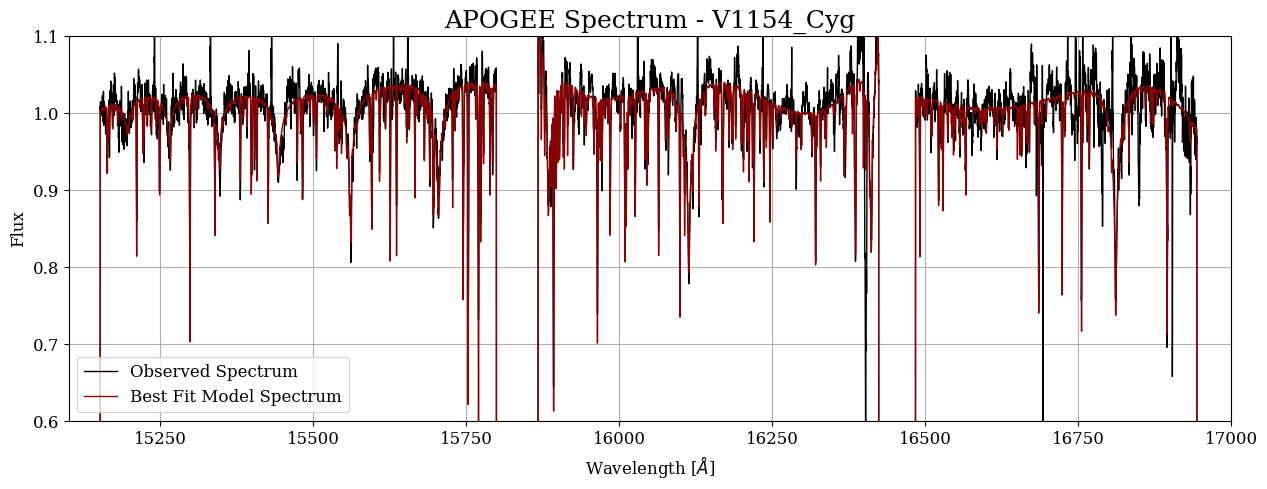

In [8]:
plt.figure(figsize=(15, 5))

# Get wavelength information from the header
# CRVAL1 is the minimum wavlength, CDELT1 is the step size (in log space) and NAXIS1 is the number of pixels
apogee_wls = np.logspace(aspcap_star[1].header['CRVAL1'],
                         aspcap_star[1].header['CRVAL1']+aspcap_star[1].header['CDELT1']*aspcap_star[3].header['NAXIS1'],
                         aspcap_star[1].header['NAXIS1'])


# Get the observed and model flux from extensions 1 and 3
observed_flux = aspcap_star[1].data
model_flux = aspcap_star[3].data

# Mask the data using the error array in extenion 2
pixel_mask = (aspcap_star[2].data < 0.1) # use only pixels with small errors (10% or less)

# Plot the observed spectrum
plt.plot(apogee_wls[pixel_mask], observed_flux[pixel_mask], c='k', label='Observed Spectrum')

# Plot the model spectrum
plt.plot(apogee_wls[pixel_mask], model_flux[pixel_mask], c='darkred', label='Best Fit Model Spectrum')

# Set axes limits
plt.ylim(0.6, 1.1)
plt.xlim(np.min(apogee_wls), np.max(apogee_wls))

# Set labels
apogee_id = aspcap_star[4].data['APOGEE_ID'][0] # String containing star's name
plt.title(f"APOGEE Spectrum - {apogee_id}")
plt.xlabel(r'Wavelength [$\AA$]')
plt.ylabel('Flux')
plt.grid()
plt.legend()

plt.show()

This is the APOGEE spectrum for this star! It looks great. We can tell it must be a hot star because of the large Hydrogen Absorption lines (for example around 15346, 15443, 15560 and 16113 angstroms - this is the Hydrogen Brackett Series!) The gaps in the spectrum around 15800 and 16400 Angstroms are due to the APOGEE instrumentation: APOGEE observes across 3 ccds, which have a small gap in wavelength coverage between them.

<a id="APOGEE-allstar"></a>
## Downloading the APOGEE allStar Catalog
We can also download the APOGEE allStar catalog, which contains a lot of useful information for the full APOGEE sample, including stellar parameters, chemical abundances, positions, and observation data for all of the stars in APOGEE.

We can do this with the `download_file` function in astroquery, knowing the MAST data URL for the allStar catalog is `mast:SDSS/apogee/allStar-dr17-synspec_rev1.fits`.

This is a fairly large file (3.9 GB), so this download may take a few minutes!

In [9]:
# Download allStar file - this may take a few minutes!
Observations.download_file('mast:SDSS/apogee/allStar-dr17-synspec_rev1.fits')

 [Done]


('COMPLETE', None, None)

In [10]:
# Open file 
allstar = Table.read('allStar-dr17-synspec_rev1.fits', hdu=1)

# Display table
allstar[:10]

FILE,APOGEE_ID,TARGET_ID,APSTAR_ID,ASPCAP_ID,TELESCOPE,LOCATION_ID,FIELD,ALT_ID,RA,DEC,GLON,GLAT,J,J_ERR,H,H_ERR,K,K_ERR,SRC_H,WASH_M,WASH_M_ERR,WASH_T2,WASH_T2_ERR,DDO51,DDO51_ERR,IRAC_3_6,IRAC_3_6_ERR,IRAC_4_5,IRAC_4_5_ERR,IRAC_5_8,IRAC_5_8_ERR,IRAC_8_0,IRAC_8_0_ERR,WISE_4_5,WISE_4_5_ERR,TARG_4_5,TARG_4_5_ERR,WASH_DDO51_GIANT_FLAG,WASH_DDO51_STAR_FLAG,TARG_PMRA,TARG_PMDEC,TARG_PM_SRC,AK_TARG,AK_TARG_METHOD,AK_WISE,SFD_EBV,APOGEE_TARGET1,APOGEE_TARGET2,APOGEE2_TARGET1,APOGEE2_TARGET2,APOGEE2_TARGET3,APOGEE2_TARGET4,TARGFLAGS,SURVEY,PROGRAMNAME,NVISITS,SNR,SNREV,STARFLAG,STARFLAGS,ANDFLAG,ANDFLAGS,VHELIO_AVG,VSCATTER,VERR,RV_TEFF,RV_LOGG,RV_FEH,RV_ALPHA,RV_CARB,RV_CHI2,RV_CCFWHM,RV_AUTOFWHM,RV_FLAG,N_COMPONENTS,MEANFIB,SIGFIB,MIN_H,MAX_H,MIN_JK,MAX_JK,GAIAEDR3_SOURCE_ID,GAIAEDR3_PARALLAX,GAIAEDR3_PARALLAX_ERROR,GAIAEDR3_PMRA,GAIAEDR3_PMRA_ERROR,GAIAEDR3_PMDEC,GAIAEDR3_PMDEC_ERROR,GAIAEDR3_PHOT_G_MEAN_MAG,GAIAEDR3_PHOT_BP_MEAN_MAG,GAIAEDR3_PHOT_RP_MEAN_MAG,GAIAEDR3_DR2_RADIAL_VELOCITY,GAIAEDR3_DR2_RADIAL_VELOCITY_ERROR,GAIAEDR3_R_MED_GEO,GAIAEDR3_R_LO_GEO,GAIAEDR3_R_HI_GEO,GAIAEDR3_R_MED_PHOTOGEO,GAIAEDR3_R_LO_PHOTOGEO,GAIAEDR3_R_HI_PHOTOGEO,ASPCAP_GRID,FPARAM_GRID,CHI2_GRID,FPARAM,FPARAM_COV,ASPCAP_CHI2,PARAM,PARAM_COV,PARAMFLAG,ASPCAPFLAG,ASPCAPFLAGS,FRAC_BADPIX,FRAC_LOWSNR,FRAC_SIGSKY,FELEM,FELEM_ERR,X_H,X_H_ERR,X_M,X_M_ERR,ELEM_CHI2,ELEMFRAC,ELEMFLAG,EXTRATARG,MEMBERFLAG,MEMBER,X_H_SPEC,X_M_SPEC,TEFF,TEFF_ERR,LOGG,LOGG_ERR,M_H,M_H_ERR,ALPHA_M,ALPHA_M_ERR,VMICRO,VMACRO,VSINI,TEFF_SPEC,LOGG_SPEC,C_FE,C_FE_SPEC,C_FE_ERR,C_FE_FLAG,CI_FE,CI_FE_SPEC,CI_FE_ERR,CI_FE_FLAG,N_FE,N_FE_SPEC,N_FE_ERR,N_FE_FLAG,O_FE,O_FE_SPEC,O_FE_ERR,O_FE_FLAG,NA_FE,NA_FE_SPEC,NA_FE_ERR,NA_FE_FLAG,MG_FE,MG_FE_SPEC,MG_FE_ERR,MG_FE_FLAG,AL_FE,AL_FE_SPEC,AL_FE_ERR,AL_FE_FLAG,SI_FE,SI_FE_SPEC,SI_FE_ERR,SI_FE_FLAG,P_FE,P_FE_SPEC,P_FE_ERR,P_FE_FLAG,S_FE,S_FE_SPEC,S_FE_ERR,S_FE_FLAG,K_FE,K_FE_SPEC,K_FE_ERR,K_FE_FLAG,CA_FE,CA_FE_SPEC,CA_FE_ERR,CA_FE_FLAG,TI_FE,TI_FE_SPEC,TI_FE_ERR,TI_FE_FLAG,TIII_FE,TIII_FE_SPEC,TIII_FE_ERR,TIII_FE_FLAG,V_FE,V_FE_SPEC,V_FE_ERR,V_FE_FLAG,CR_FE,CR_FE_SPEC,CR_FE_ERR,CR_FE_FLAG,MN_FE,MN_FE_SPEC,MN_FE_ERR,MN_FE_FLAG,FE_H,FE_H_SPEC,FE_H_ERR,FE_H_FLAG,CO_FE,CO_FE_SPEC,CO_FE_ERR,CO_FE_FLAG,NI_FE,NI_FE_SPEC,NI_FE_ERR,NI_FE_FLAG,CU_FE,CU_FE_SPEC,CU_FE_ERR,CU_FE_FLAG,CE_FE,CE_FE_SPEC,CE_FE_ERR,CE_FE_FLAG,YB_FE,YB_FE_SPEC,YB_FE_ERR,YB_FE_FLAG,VISIT_PK
bytes64,bytes30,bytes58,bytes71,bytes77,bytes6,int32,bytes20,bytes30,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,bytes16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,float32,float32,bytes16,float32,bytes32,float32,float32,int32,int32,int32,int32,int32,int32,bytes132,bytes32,bytes32,int32,float32,float32,int64,bytes132,int64,bytes132,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes8,"float32[21,9]",float32[21],float32[9],"float32[9,9]",float32,float32[9],"float32[9,9]",int64[9],int64,bytes256,float32,float32,float32,float32[27],float64[27],float32[27],float32[27],float32[27],float32[27],float32[27],float32[27],int64[27],int32,int64,bytes10,float32[27],float32[27],float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,

<a id="APOGEE-plot"></a>
## Plotting an HR Diagram (or Kiel Diagram) with APOGEE

When characterizing stars, a useful plot is the *HR diagram*, which helps classify stars by their different types (for example, a star can be a Sun-like main sequence star or a massive Red Giant star). Let's plot an HR Diagram using APOGEE data. 

Traditional HR diagrams plot a star's *color* on the x-axis and its brightness (or *magnitude*) on the y-axis. For this excerise, we'll be using the star's *temperature* ($T_{eff}$) as a substitute for color and the surface gravity ($\log g$) as a proxy for brightness. This variation on the HR diagram is technically called a Kiel Diagram, but they are very similar in appearance and interpretation.

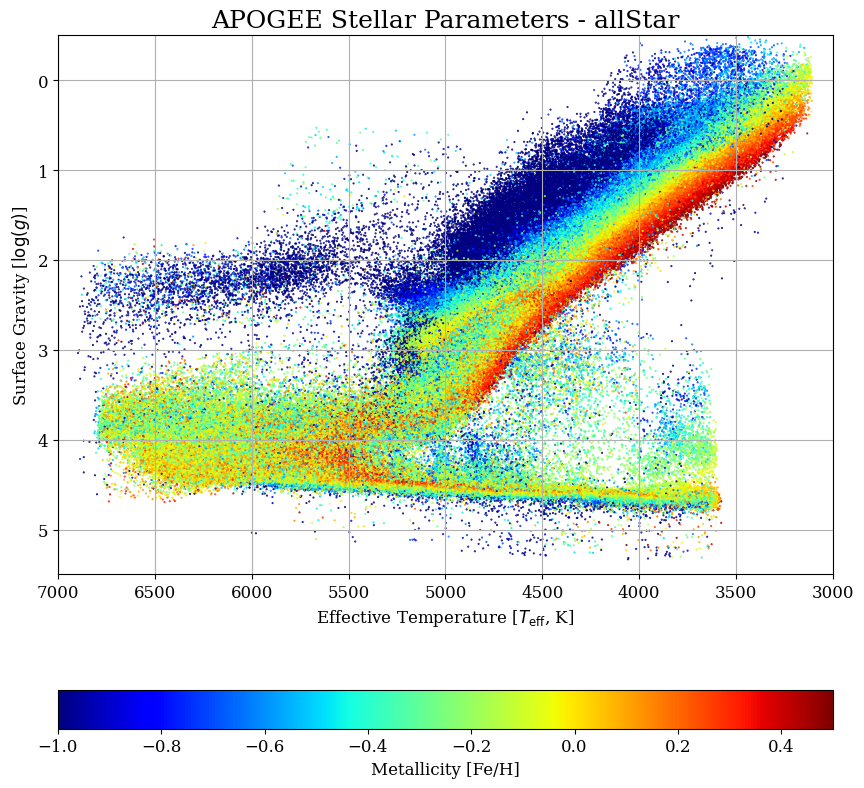

In [11]:
# Plot HR Diagram form APOGEE catalog
plt.figure(figsize=(10, 10))

# Plot Temperature (TEFF) against surface gravity (LOGG)
# And color points by their metallicity (FE_H)
im = plt.scatter(allstar['TEFF'], allstar['LOGG'], c=allstar['FE_H'],
                 marker='.', s=1, zorder=1,
                 cmap='jet', vmin=-1, vmax=0.5)
        
# Add colorbar legend to plot
plt.colorbar(im, location='bottom', label='Metallicity [Fe/H]')

        
# Labels and titles
plt.xlim(7000, 3000)
plt.ylim(5.5, -0.5)
plt.xlabel(r'Effective Temperature [$T_{\rm{eff}}$, K]')
plt.ylabel(r'Surface Gravity [$\log(g)$]')
plt.grid()
plt.title('APOGEE Stellar Parameters - allStar')

plt.show()

This is an HR Diagram made with APOGEE data! The Main Sequence stars are along the bottom, and the Red Giant Branch is in the upper-right portion. The Horizontal Branch stars are the upper-left group of dark blue (metal poor) points.

<a id="TESS"></a>
# Searching for TESS Data of this Star

Now let's search MAST for a light curve of our Cepheid Variable star.

<a id="TESS-query"></a>
## Coordinate search using astroquery.mast


In [12]:
# Retrieve RA and DEC of APOGEE star
ra = apogee_obs_list['s_ra'][0]
dec = apogee_obs_list['s_dec'][0]
# make a SkyCoord object from these coordinates
coord = SkyCoord(ra=ra*u.deg, dec=dec*u.deg)
print(coord)

# Search for TESS observations based on coordinates
tess_obs = Observations.query_criteria(coordinates=coord, # Search by coordinates
                                       radius=(1/60/60)*u.deg, # search within 1 arcsecond
                                       # Search for TESS observations
                                       obs_collection='TESS',
                                       # Select only Science observations (not calibration files)
                                       intentType='science',
                                       # Search for time series data (light curves)
                                       dataproduct_type='timeseries',
                                       dataURL='*_lc.fits'
                                       )

# Display Results
tess_obs

<SkyCoord (ICRS): (ra, dec) in deg
    (297.06439209, 43.12688065)>


intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,dataproduct_type,proposal_pi,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_id,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,objID,objID1,distance
str7,str4,str4,str10,str4,str4,str7,str9,str1,str47,float64,float64,str10,str14,int64,float64,float64,float64,float64,float64,str1,float64,str7,str1,int64,str47,str1,str73,str6,bool,float64,str8,str9,str9,float64
science,TESS,SPOC,Photometer,TESS,TESS,Optical,272943843,--,tess2019226182529-s0015-0000000272943843-0151-s,297.064442996851,43.1269331469927,timeseries,"Ricker, George",3,58710.86620314,58736.91161649,120.0,600.0,1000.0,--,58756.3333334,G022062,--,15,CIRCLE ICRS 297.06444300 43.12693315 0.00138889,--,mast:TESS/product/tess2019226182529-s0015-0000000272943843-0151-s_lc.fits,PUBLIC,False,nan,27483764,70551762,70551762,0.0
science,TESS,SPOC,Photometer,TESS,TESS,Optical,272943843,--,tess2021204101404-s0041-0000000272943843-0212-s,297.064442996851,43.1269331469927,timeseries,"Ricker, George",3,59419.4908296875,59446.08111446759,120.0,600.0,1000.0,--,59477.0,G04028,--,41,CIRCLE 297.064443 43.12693315 0.00138889,--,mast:TESS/product/tess2021204101404-s0041-0000000272943843-0212-s_lc.fits,PUBLIC,False,nan,62803464,120246308,120246308,0.0
science,TESS,SPOC,Photometer,TESS,TESS,Optical,272943843,--,tess2022190063128-s0054-0000000272943843-0227-s,297.064442996851,43.1269331469927,timeseries,"Ricker, George",3,59769.40013475694,59795.63100395833,120.0,600.0,1000.0,--,59828.0,G04028,--,54,CIRCLE 297.064443 43.12693315 0.00138889,--,mast:TESS/product/tess2022190063128-s0054-0000000272943843-0227-s_lc.fits,PUBLIC,False,nan,91557375,175289917,175289917,0.0
science,TESS,SPOC,Photometer,TESS,TESS,Optical,272943843,--,tess2022217014003-s0055-0000000272943843-0242-s,297.064442996851,43.1269331469927,timeseries,"Ricker, George",3,59796.60183872685,59823.76548444445,120.0,600.0,1000.0,--,59841.0,G04028,--,55,CIRCLE 297.064443 43.12693315 0.00138889,--,mast:TESS/product/tess2022217014003-s0055-0000000272943843-0242-s_lc.fits,PUBLIC,False,nan,93784511,182251539,182251539,0.0


There are a handful of results, but we can find the closest match to this star using the "distance" column which returns the distance (in arcsecs) of each match to our cone search. There are several results with distance of 0, (this star was observed in multiple TESS sectors), so we will just use the first result.

In [13]:
tess_obs[np.argmin(tess_obs['distance'])]

intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,dataproduct_type,proposal_pi,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_id,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,objID,objID1,distance
str7,str4,str4,str10,str4,str4,str7,str9,str1,str47,float64,float64,str10,str14,int64,float64,float64,float64,float64,float64,str1,float64,str7,str1,int64,str47,str1,str73,str6,bool,float64,str8,str9,str9,float64
science,TESS,SPOC,Photometer,TESS,TESS,Optical,272943843,--,tess2019226182529-s0015-0000000272943843-0151-s,297.064442996851,43.1269331469927,timeseries,"Ricker, George",3,58710.86620314,58736.91161649,120.0,600.0,1000.0,--,58756.3333334,G022062,--,15,CIRCLE ICRS 297.06444300 43.12693315 0.00138889,--,mast:TESS/product/tess2019226182529-s0015-0000000272943843-0151-s_lc.fits,PUBLIC,False,nan,27483764,70551762,70551762,0.0


And download this file similar to what we did with APOGEE before:

In [14]:
# Get product list
tess_products = Observations.get_product_list(tess_obs[np.argmin(tess_obs['distance'])])

# Show products
tess_products

obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level,filters
str8,str4,str10,str47,str18,str1,str73,str7,str28,str2,str1,str4,str20,str7,str55,int64,str8,str6,int64,str4
27483764,TESS,timeseries,tess2019226182529-s0015-0000000272943843-0151-s,Light curves,S,mast:TESS/product/tess2019226182529-s0015-0000000272943843-0151-s_lc.fits,SCIENCE,Minimum Recommended Products,LC,--,SPOC,spoc-4.0.28-20200407,G022062,tess2019226182529-s0015-0000000272943843-0151-s_lc.fits,1906560,27483764,PUBLIC,3,TESS
27483764,TESS,timeseries,tess2019226182529-s0015-0000000272943843-0151-s,Target pixel files,S,mast:TESS/product/tess2019226182529-s0015-0000000272943843-0151-s_tp.fits,SCIENCE,Minimum Recommended Products,TP,--,SPOC,spoc-4.0.28-20200407,G022062,tess2019226182529-s0015-0000000272943843-0151-s_tp.fits,45956160,27483764,PUBLIC,2,TESS


In [15]:
# Download Products
manifest = Observations.download_products(tess_products, description='Light curves')

 [Done]


<a id="TESS-lightcurve"></a>
# Plotting a light curve from TESS 

The TESS light curve file has three extensions:
- The primary header (HDU0)
- The light curve data (HDU1)
- aperture Information (HDU2)

In [16]:
# Open file
tess_lc = fits.open(manifest['Local Path'][0])

# Print file information
tess_lc.info()

Filename: ./mastDownload/TESS/tess2019226182529-s0015-0000000272943843-0151-s/tess2019226182529-s0015-0000000272943843-0151-s_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    161   18757R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   


We can plot the light curve by using the `TIME` and `SAP_FLUX` data from the first extension:

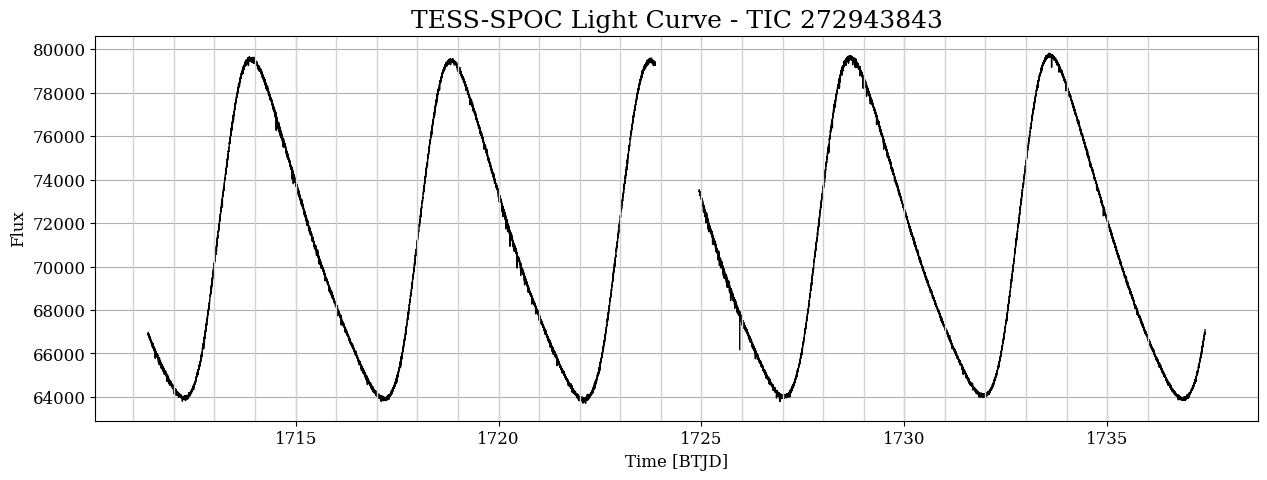

In [17]:
plt.figure(figsize=(15, 5))

# Plot the observed spectrum
plt.plot(tess_lc['LIGHTCURVE'].data['TIME'], tess_lc['LIGHTCURVE'].data['SAP_FLUX'], c='k', label='TESS Light Curve')

# Plot a vertical line for every day
for i in range(int(np.nanmin(tess_lc['LIGHTCURVE'].data['TIME'])), int(np.nanmax(tess_lc['LIGHTCURVE'].data['TIME']))):
    plt.axvline(i, c='lightgrey')
    
# Set labels
plt.title(f"TESS-SPOC Light Curve - {tess_lc[0].header['OBJECT']}")
plt.xlabel('Time [BTJD]')
plt.ylabel('Flux')
plt.grid()

plt.show()

This is a very typical light curve for a Cepheid Variable star, and TESS observed the variations in flux really well! This star cycles over a period of about 6 days.

<a id="Combining-APOGEE-and-TESS-data"></a>
# Combining APOGEE and TESS data

Now we are ready to combine everything: the HR Diagram, the spectrum, and the TESS light curve into a single plot!

<a id="Plotting-APOGEE-and-TESS-data-together"></a>
## Plotting APOGEE and TESS data together

In the below cell, we define a helper function to plot all of the data together for our Cepheid Variable star:


In [18]:
def plot_spectrum_and_lc(apogee_spec, tess_lightcurve):
    """Helper function for plotting the HR Diagram, APOGEE Spectrum, and TESS Light Curve for a star"""
    # Set up axes for subplots
    plt.figure(figsize=(20, 10))
    ax1 = plt.subplot2grid((3, 5), (0, 0), colspan=2, rowspan=3)
    ax2 = plt.subplot2grid((3, 5), (0, 2), colspan=3, rowspan=1)
    ax3 = plt.subplot2grid((3, 5), (1, 2), colspan=3, rowspan=1)
    
    # ===================
    # AX1 - HR Diagram
    # ===================
    # Plot HR Diagram form APOGEE catalog
    # Only plot 1 out of every 10 points with [::10] to reduce plotting time
    im = ax1.scatter(allstar['TEFF'][::10], allstar['LOGG'][::10], c=allstar['FE_H'][::10],
                     marker='.', s=1, cmap='jet', vmin=-1, vmax=0.5, zorder=1)
            
    plt.colorbar(im, ax=ax1, location='bottom', label='Metallicity [Fe/H]')
            
    # Plot the specific star
    indx = np.where(allstar['APOGEE_ID'] == apogee_spec[4].data['APOGEE_ID'][0])[0][0]
    if allstar['TEFF'][indx]: # if the star has valid apogee parameters
        ax1.scatter(allstar['TEFF'][indx], allstar['LOGG'][indx], c=allstar['FE_H'][indx],
                    marker='*', s=1000, cmap='jet', edgecolor='k', lw=2,
                    vmin=-1, vmax=0.5, zorder=5, label='APOGEE Parameters')
    else: # params from aspcapstar (uncalibrated)
        print('WARNING: Quality Warning Flags on ASPCAP star parameters. ASPCAP parameters may not be reliable for this star.')
        ax1.scatter(apogee_spec[4].data['FPARAM'][0][0], apogee_spec[4].data['FPARAM'][0][1], c=apogee_spec[4].data['FPARAM'][0][3],
                    marker='*', s=1000, cmap='jet', edgecolor='k', lw=2, vmin=-1, vmax=0.5, zorder=5, label='APOGEE Parameters')
                
    # Labels and titles
    ax1.set_xlim(7000, 3000)
    ax1.set_ylim(5.5, -0.5)
    ax1.set_xlabel(r'Effective Temperature [$T_{\rm{eff}}$, K]')
    ax1.set_ylabel(r'Surface Gravity [$\log(g)$]')
    ax1.grid()
    ax1.set_title('APOGEE Stellar Parameters - allStar')
            
    # ===================
    # AX2 - APOGEE Spectrum
    # ===================        
    # Get the observed and model flux from extensions 1 and 3
    observed_flux = apogee_spec[1].data
    model_flux = apogee_spec[3].data
    
    # Mask the data using the error array in extenion 2
    pixel_mask = (apogee_spec[2].data < 0.1) # use only pixels with small errors (10% or less)
    
    # Plot the observed spectrum
    ax2.plot(apogee_wls[pixel_mask], observed_flux[pixel_mask], c='k', label='Observed Spectrum')
    
    # Plot the model spectrum
    ax2.plot(apogee_wls[pixel_mask], model_flux[pixel_mask], c='darkred', label='Best Fit Model Spectrum')
    
    # Set axes limits
    ax2.set_ylim(0.6, 1.1)
    ax2.set_xlim(np.min(apogee_wls), np.max(apogee_wls))
    
    apogee_id = apogee_spec[4].data['APOGEE_ID'][0] # String containing star's name
    ax2.set_title(f"APOGEE Spectrum - {apogee_id}")
    ax2.set_xlabel(r'Wavelength [$\AA$]')
    ax2.set_ylabel('Flux')
    ax2.grid()
    ax2.legend()
    
    # ===================
    # AX3 - TESS Light Curve
    # ===================
    # Plot Light Curve
    ax3.plot(tess_lightcurve['LIGHTCURVE'].data['TIME'], tess_lightcurve['LIGHTCURVE'].data['SAP_FLUX'], c='k', label='TESS Light Curve')
    
    # Plot a vertical line for every day
    for i in range(int(np.nanmin(tess_lightcurve['LIGHTCURVE'].data['TIME'])), int(np.nanmax(tess_lightcurve['LIGHTCURVE'].data['TIME']))):
        ax3.axvline(i, c='lightgrey')
        
    # Set labels
    ax3.set_title(f"TESS-SPOC Light Curve - {tess_lightcurve[0].header['OBJECT']}")
    ax3.set_xlabel('Time [BTJD]')
    ax3.set_ylabel('Flux')
    ax3.grid()
            
    plt.tight_layout()
    save_name = f"{apogee_id}_APOGEE_spec_TESS_lightcurve.png"
    plt.savefig(save_name, bbox_inches='tight')
    print(f"Saved to {save_name}")
    plt.show()

Saved to V1154_Cyg_APOGEE_spec_TESS_lightcurve.png


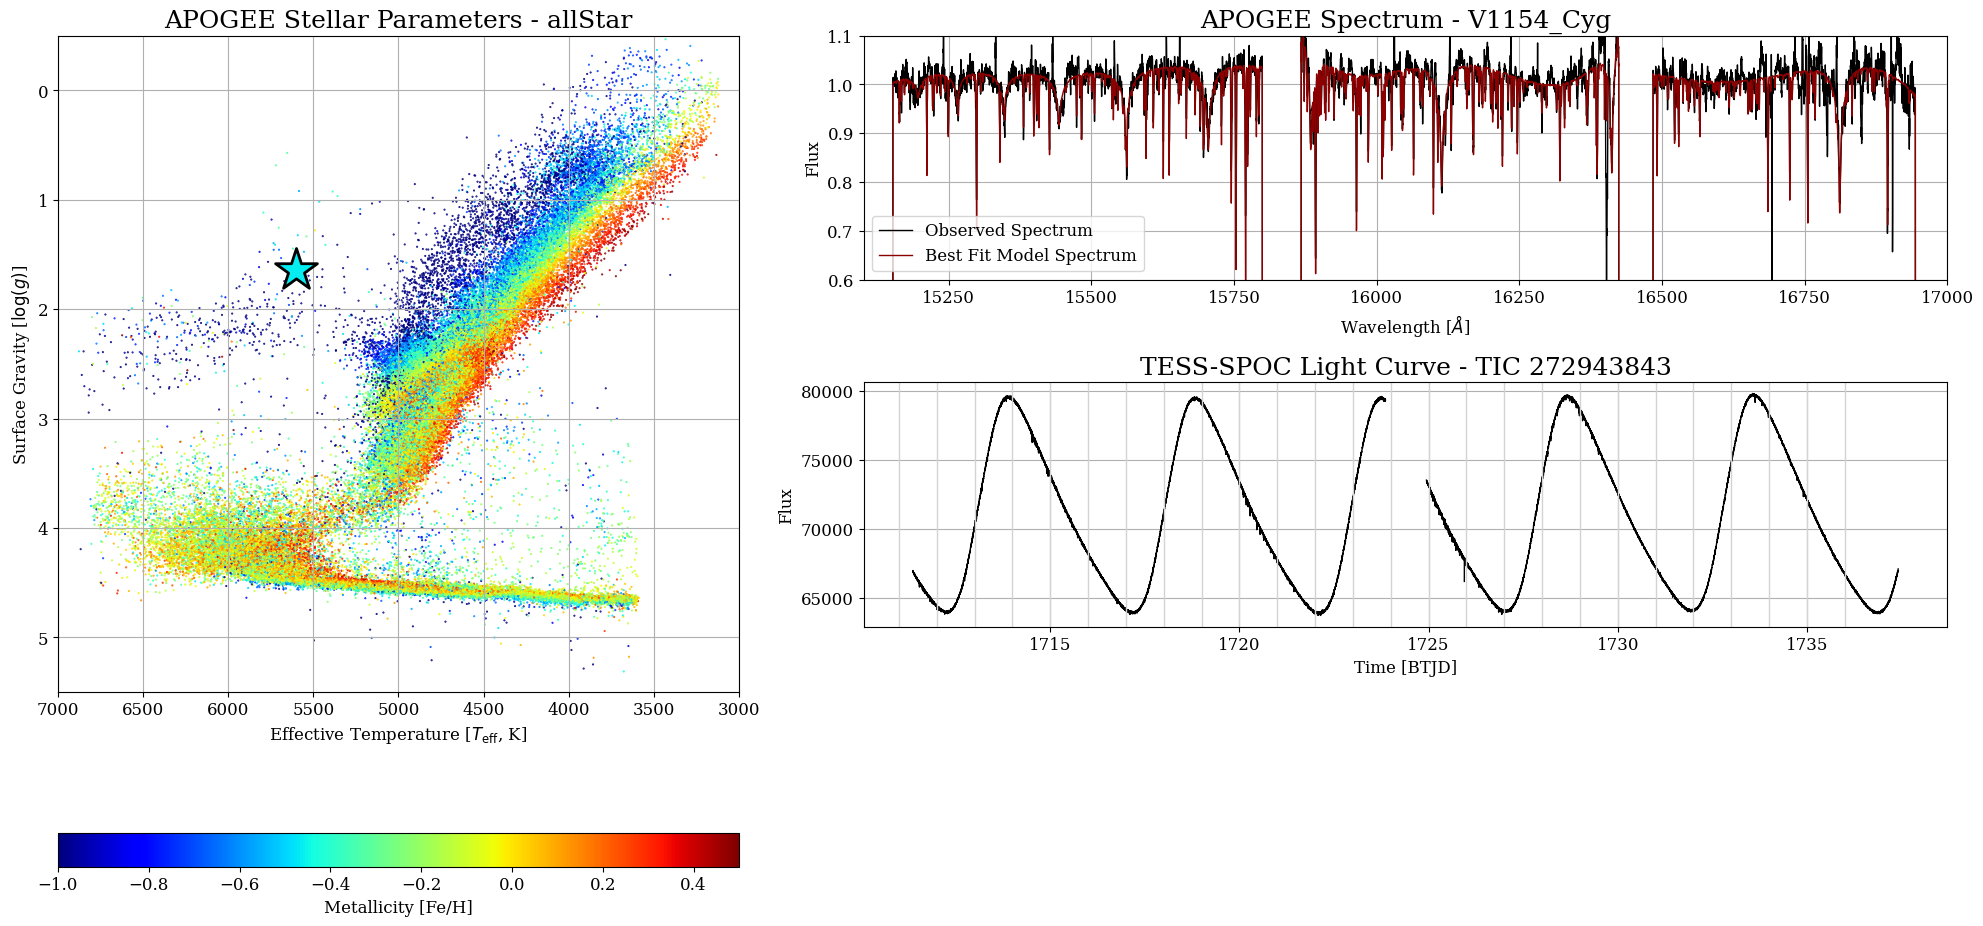

In [19]:
aspcap_star = fits.open('mastDownload/SDSS/sdss_apogee_apo1m_cepheid_v1154_cyg/aspcapStar-dr17-V1154_Cyg.fits')
tess_lc = fits.open(manifest['Local Path'][0])

plot_spectrum_and_lc(aspcap_star, tess_lc)

Like we saw before, this star is a metal-poor horiztonal branch star, and has a period of about 6 days. A very cool example of a Cepheid Variable!

<a id="Exploring-Variables"></a>

## Exploring different types of Variable Stars

So far in this notebook, we've plotted the stellar parameters, spectrum, and light curve of a Cepheid variable star. But what about other types of variables? Here are a few more stars in APOGEE that we will explore and plot in this section!

* 2M11361176+8117369: a RR Lyrae Variable Star, a type of quickly-pulsating old, low-mass star
* 2M19181706+5141323: a "Rotationally Variable" Star, a main sequence dwarf star with large starspots blocking out some of the flux on one side of the star as it rotates
* 2M19223768+5044541: an Eclipsing Binary Star, a type of close binary system with two stars rotating around each other

Since we're going to be going through the same process for each star (search for APOGEE data -> search for TESS data -> plot results), Let's write a helper function:

In [20]:
def plot_variable_star(apogee_id: str) -> None:
    """
    This function takes a star name from APOGEE and downloads the APOGEE and TESS
    data for this star. It then plots the APOGEE spectrum and TESS Lightcurve together.

    Parameters:
    ============
    apogee_id: str
        name of star we want to plot
    """
    print("="*50)
    print(f"Plotting Spectrum and Light Curve for {apogee_id}")
    print("="*50)

    # Search for APOGEE Data
    print("Searching For APOGEE Data...")
    apogee_obs_list = Observations.query_criteria(provenance_name='APOGEE',
                                                  target_name=apogee_id)
    print("Downloading APOGEE Data...")
    # Download APOGEE Spectrum
    product_list = Observations.get_product_list(apogee_obs_list)
    manifest = Observations.download_products(product_list, productSubGroupDescription='ASPCAPSTAR')
    # Open APOGEE Spectrum
    aspcapstar = fits.open(manifest['Local Path'][0])

    # Coordinates of Star
    coord = SkyCoord(ra=apogee_obs_list['s_ra'][0]*u.deg, dec=apogee_obs_list['s_dec'][0]*u.deg)

    # Search for TESS observations based on coordinates
    print("Searching For TESS Data...")
    tess_obs = Observations.query_criteria(coordinates=coord, # Search by coordinates
                                           radius=(1/60/60)*u.deg, # search within 1 arcsecond
                                           obs_collection='TESS', # Search for TESS observations
                                           intentType='science', # Select only Science observations (not calibration files)
                                           dataproduct_type='timeseries', dataURL="*lc.fits") # Search for time series data (light curves)

    # Pick closest match by distance
    tess_obs = tess_obs[np.argmin(tess_obs['distance'])]

    # Download TESS Light Curve
    print("Downloading TESS Data...")
    tess_products = Observations.get_product_list(tess_obs)
    manifest = Observations.download_products(tess_products, description='Light curves')

    # Open light curve
    tess_lc = fits.open(manifest['Local Path'][0])

    # Plot star
    print("Making Plot...")
    plot_spectrum_and_lc(aspcapstar, tess_lc)  

<a id="rr-lyrae"></a>
## RR Lyrae Variable - 2M11361176+8117369

Plotting Spectrum and Light Curve for 2M11361176+8117369
Searching For APOGEE Data...


 [Done]


Searching For TESS Data...


 [Done]


Making Plot...


Saved to 2M11361176+8117369_APOGEE_spec_TESS_lightcurve.png


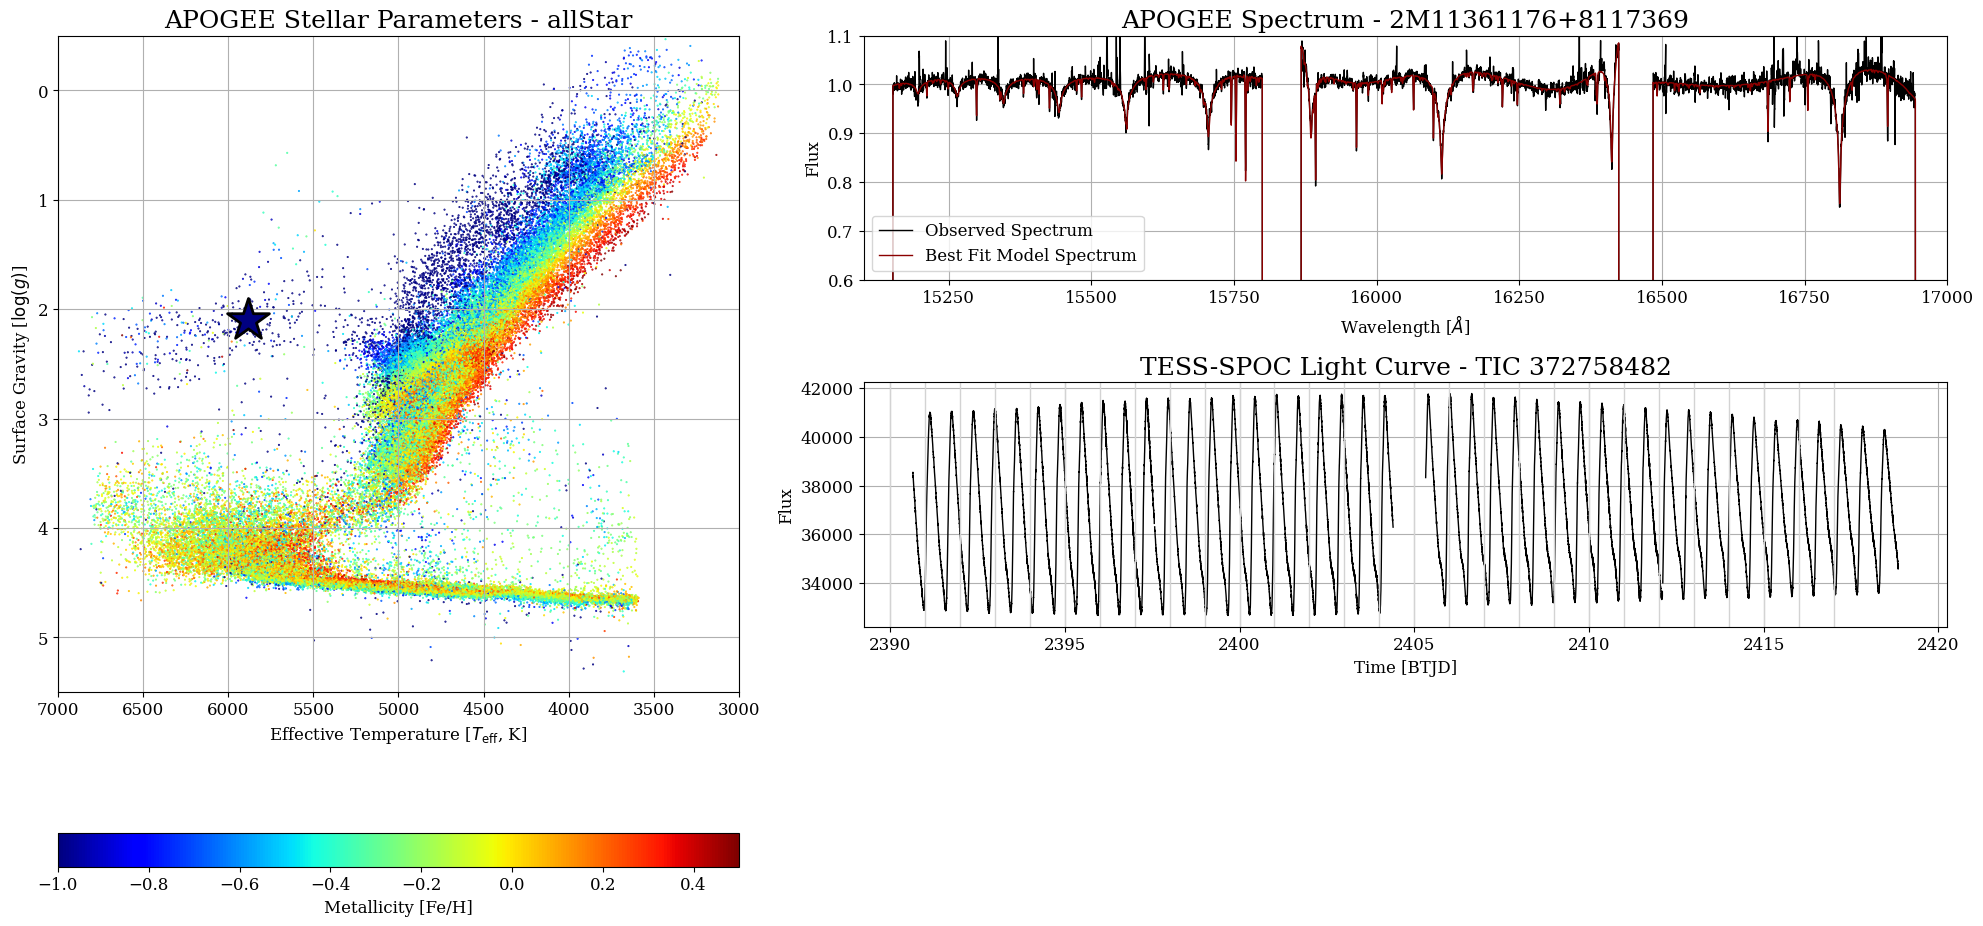

In [21]:
# Define the star name we want to search for
star_name = '2M11361176+8117369'
# Call our helper function to download data and plot the results
plot_variable_star(star_name)

This star is also a horizontal branch star, but it is hotter and more metal-poor than the Cepheid Variable was. It pulsates a lot more quickly too - from the light curve, the pulsation period is about 12 hours!

<a id="rotationally-variable"></a>
## Rotationally Variable - 2M19181706+5141323 

Plotting Spectrum and Light Curve for 2M19181706+5141323
Searching For APOGEE Data...


 [Done]


Searching For TESS Data...


 [Done]


Making Plot...


Saved to 2M19181706+5141323_APOGEE_spec_TESS_lightcurve.png


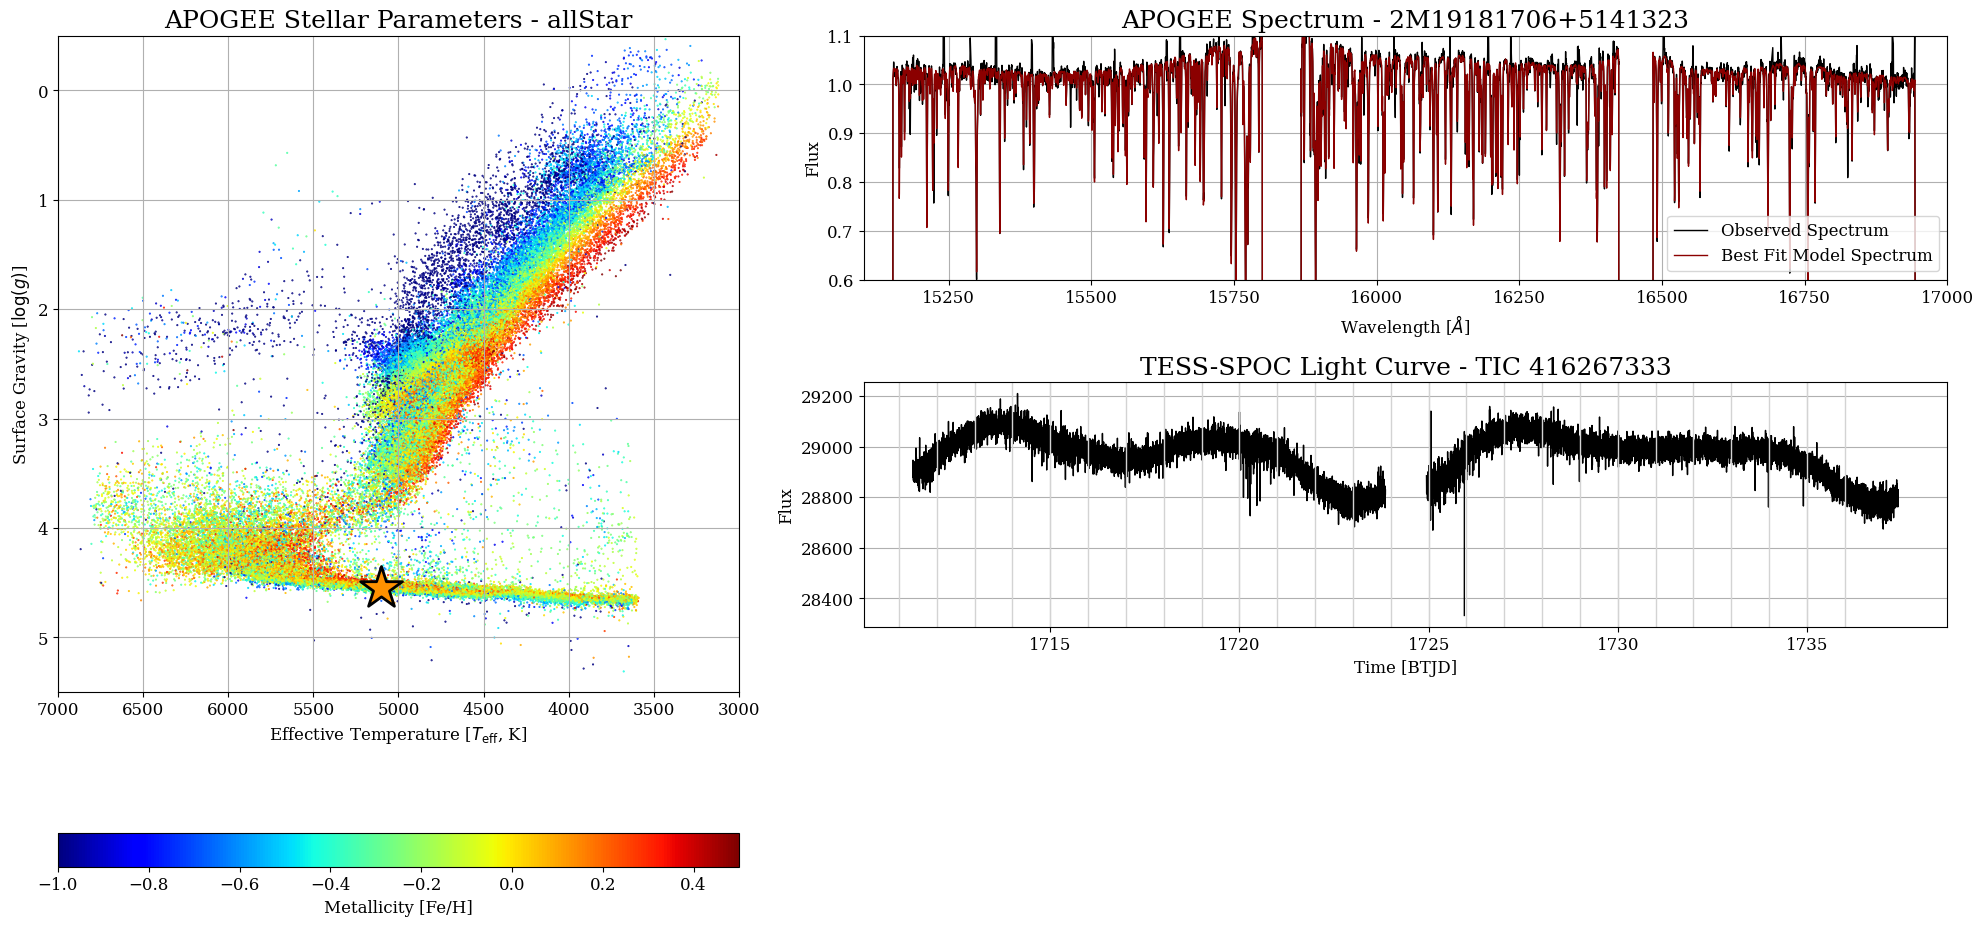

In [22]:
star_name = '2M19181706+5141323'
plot_variable_star(star_name)

This star is a main-sequence dwarf star, a lot like the Sun but a little bit cooler in temperature. Its light curve is not as periodic as the other two, because the variation in flux is caused by the stars rotation, not pulsation! Large star spots likely block out the flux on part of this star, causing it to dip in brightness roughly every 14 days.

<a id="eclipsing-binary"></a>
## Eclipsing Binary Star - 2M19203184+3830492

Plotting Spectrum and Light Curve for 2M19203184+3830492
Searching For APOGEE Data...


 [Done]


 [Done]


Searching For TESS Data...


 [Done]


Making Plot...


Saved to 2M19203184+3830492_APOGEE_spec_TESS_lightcurve.png


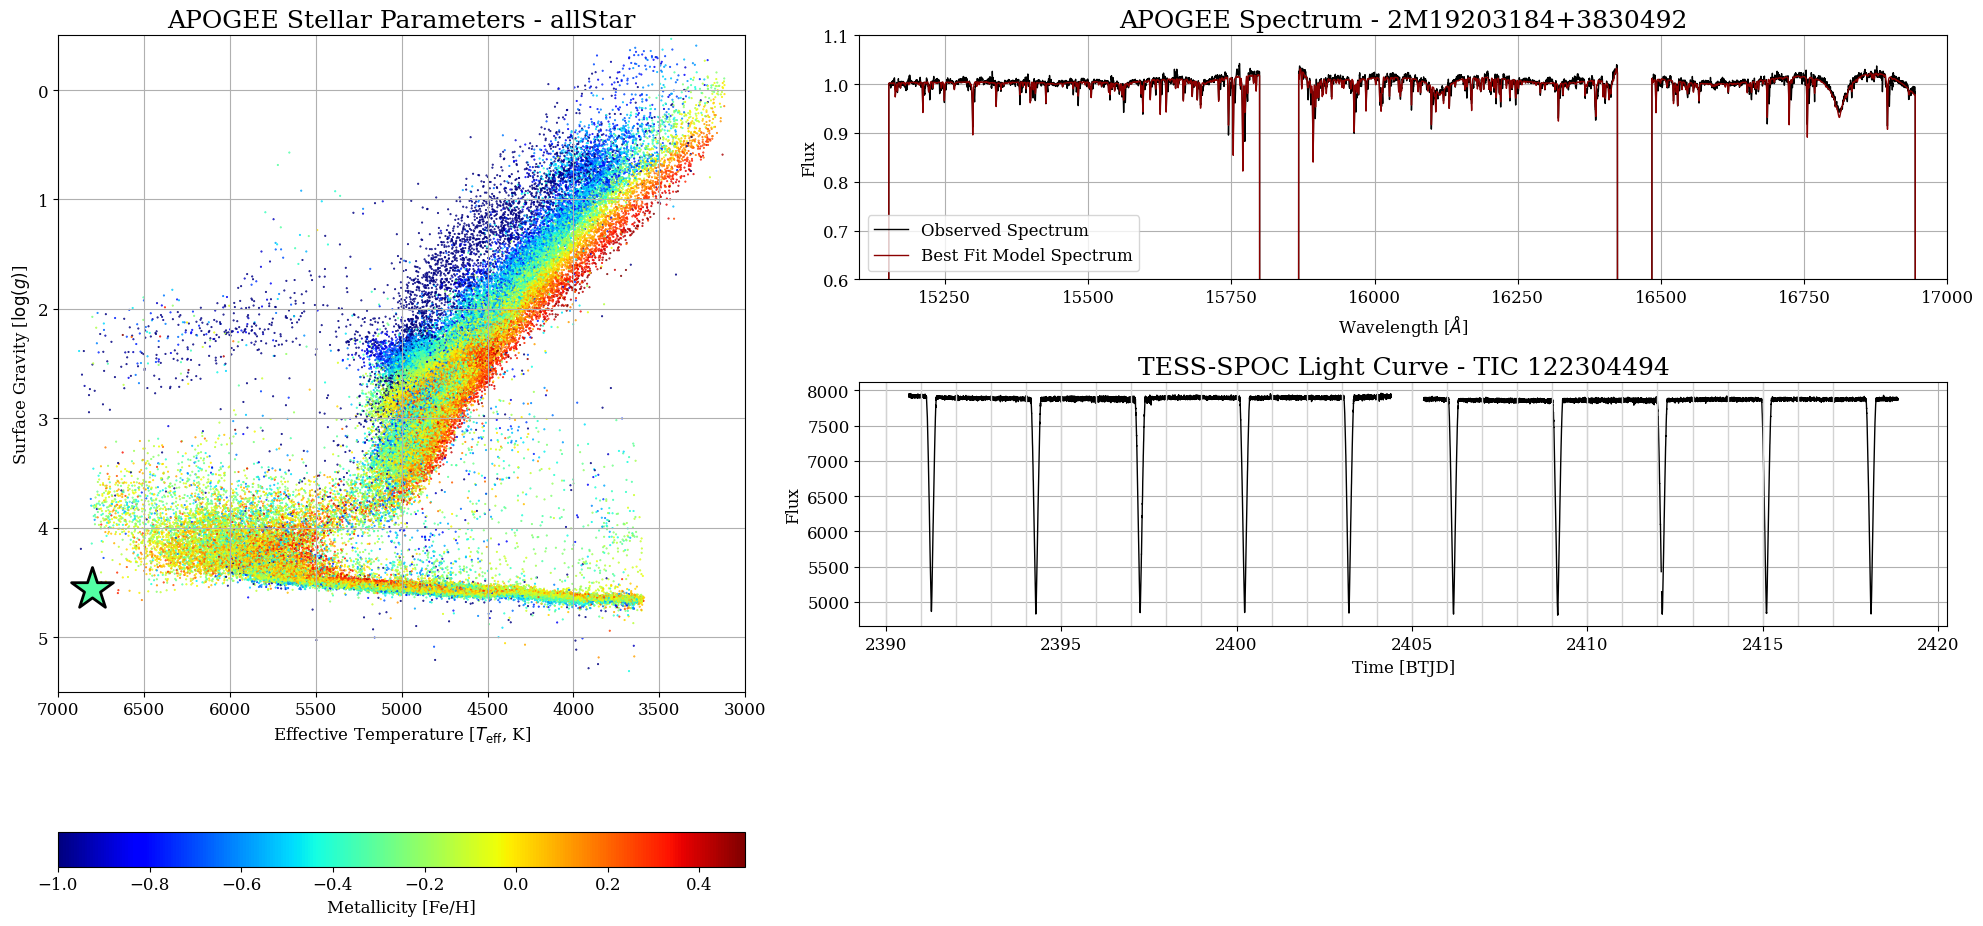

In [23]:
star_name = '2M19203184+3830492'
plot_variable_star(star_name)

Every few days, this star's flux dips dramatically in brightness by over 25%! This system is an eclipsing binary pair - a pair of stars orbiting around each other, and eclipsing one another along our line-of-sight, causing the fluctuations in brightness seen in the light curve. 

Because this is an eclipsing binary pair, the ASPCAP parameters have a quality warning and may not be as reliable as the parameter estimates for other stars (which explains why the star is slightly off of the main sequence in the HR Diagram!). The single visit spectra (apVisit files) are probably more useful for most science cases involving binary stars than the combined spectrum (aspcapStar file) we plotted here. The apVisit files can be dowloaded using the `productSubGroupDescription='APVISIT'` keyword when downloading the products.

***
Congratulations! You have reached the end of this tutorial notebook. You have learned how to access and download APOGEE data from MAST, and combine it with TESS light curves to characterize different types of variable stars.

<a id="Resources"></a>

# Additional Resources

Additional resources are linked below:

- [SDSS Legacy Archive at MAST](https://outerspace.stsci.edu/display/SDSS/The+SDSS+Legacy+Archive+at+MAST)
- [SDSS-IV APOGEE Survey](https://www.sdss4.org/dr17/irspec/)
- [astroquery.mast User Manual](https://astroquery.readthedocs.io/en/latest/mast/mast.html)
- [MAST API](https://mast.stsci.edu/api/v0/index.html)


## Citations
<a id="Citations"></a>

If you use MaNGA data for published research, see the following links for information on which citations to include in your paper:

* [Citing SDSS](https://sdss.org/collaboration/citing-sdss/)
* [Citing APOGEE](https://www.sdss4.org/dr17/irspec/technical-papers-and-additional-references/)
* [Citing MAST](https://archive.stsci.edu/publishing/mission-acknowledgements)
* [Citing astropy](https://www.astropy.org/acknowledging.html)


## About this Notebook

<a id="About"></a>

**Author(s):** Julie Imig (jimig@stsci.edu) <br>
**Keyword(s):** Tutorial, SDSS, APOGEE, TESS, stars <br>
**First published:** January 2025 <br>
**Last updated:** January 2025 <br>

***
[Top of Page](#top)
<img style="float: right;" src="https://raw.githubusercontent.com/spacetelescope/style-guides/master/guides/images/stsci-logo.png" alt="Space Telescope Logo" width="200px"/> 